# P1; Drake Dvorak; 12/14/2022

## Data Import

In [58]:
# libraries allow for extended functionality beyond the basic, out-of-the-box functionaliy of Python
import numpy as np # provides the data structures, algorithms, and library glue needed for most scientific applications involving numerical data in Python
import pandas as pd # provides high-level data structures and functions designed to make working with structured or tabular data fast, easy, and expressive
import seaborn as sns # provides simple yet significant data visualization capabilities 
import matplotlib.pyplot as plt # allows for easy production of plots and other two-dimensional data visualizations
from sklearn.model_selection import GridSearchCV # used to exhaustively consider all parameter combinations
from sklearn import tree # allows for the creation of decsion tree models
from sklearn import metrics # used to measure classification performance
from sklearn.svm import SVC # allows for the creation of support vector classification models
from sklearn.neural_network import MLPClassifier # allows for the creation of multi-layer perception classifiers models
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor # allows for the creation of k-nearest neighbors classifier model
from sklearn.cluster import KMeans # provides functionality for data clustering 
from sklearn.preprocessing import StandardScaler # allows a dataframe to be scaled and standardized
from sklearn.dummy import DummyClassifier # provides classifier model that acts as a baseline for more complex models
from sklearn.metrics import confusion_matrix # provides a table used in classification problems to assess where errors in the model are made
import warnings 
warnings.filterwarnings('ignore') 

In [59]:
DF_Main = pd.read_csv("https://raw.githubusercontent.com/matthewpecsok/4482_fall_2022/main/data/census.csv") # import csv file and convert to a pandas dataframe

## Task 1: High-level Exploration of the Dataset

In [60]:
# description of entire dataframe
DF_Main.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


The preceeding table gives a high level overview of the entire dataset. Looking at the max values for each numerical column it is evident that the dataset will need to be scaled when performing data analysis or producing a model that requires standardized data, such as the KNN model, as the max value for the 'capital gain' column is almost 100K more than the max value for the 'education-num' column. The top values for each categorical column are displayed, allowing for an immediatee impression/idea of what the typical instance is like. It's no surprise that 'white' and 'male' are the most prevalent classes for the race and sex columns, respectively. 

In [61]:
rows = DF_Main.shape[0] # calculates the number of rows in the dataframe
print(rows)

32561


This code only gives the total number of rows in the dataset. There are 32,561 rows, which is a relatively large dataset (the titanic dataset only has approximatley 1,300 rows). It would not be efficient or feasible to analyze a dataset of this length without the more advanced data mining techhniques learned in this class. 

In [62]:
col = DF_Main.shape[1] # calculates the number of columns in the dataframe
col

15

There are 15 columns in the dataset. However, the number of columns will change when the data is one hot encoded to better fit the modeling techniques explored. 

In [63]:
DF_Main.info() # provides basic information about dataframe, including column/variable name, number of nonnull values for each column, and the datatype of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  y               32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


This code provides information already discovered, such as total column count, but also provides additional important information such as the datatype for each column and the number of non-null values for each column. Cross referencing the total number of rows in the dataset against the number of non-null values for each column provided here allows us to determine the amount of null values for each column. In this case, because the total number of columns (entries) is calculated to be 32,561 and each column in the dataset has 32,651 non-null values, it can be concluded that there are no null values in the dataset. 

In [64]:
DF_Main.isnull().sum() # total number of null values in each column

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
y                 0
dtype: int64

This code block represents an easier, more efficent way to determine the number of null values present in each column. 

In [65]:
DF_Main.head() # displays the first five rows in the dataframe

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


The head() method displays the top five rows in the dataset (by default). Most of the code I have discussed up to this point outputs information derived from the dataset. This code just gives the raw dataset rows and helps me understand the type of data I am working with at a basic, fundamental level. I often use this code to briefly get an idea of what the classes for each categorical variable are. 

## Task 2: Column by Column Exploration

### Numerical Columns

#### Age 


In [66]:
# description of column, including count, mean, standard deviation, minimum and maximum, median and quartile percentiles, and datatype
DF_Main['age'].describe() 

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [67]:
# number of null values in column
DF_Main['age'].isnull().sum()

0

Text(0, 0.5, 'Count')

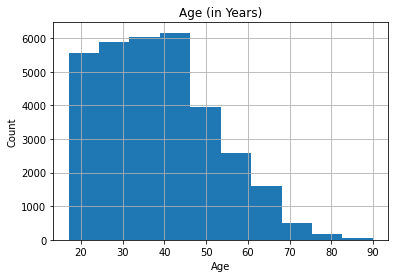

In [68]:
from matplotlib import axis
# histogram representing distribution of column values
DF_Main.age.hist() 
plt.title( 'Age (in Years)' )
plt.xlabel('Age')
plt.ylabel('Count')


Its hard to tell if the sample distribution of age is representative of the population as a whole without knowing the estimated population distribution of age. The data does not include any respondents under the age of 16. The data is clearly more skewed towards a younger population.  

#### Final Weight

In [69]:
DF_Main['fnlwgt'].describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

In [70]:
DF_Main['fnlwgt'].isnull().sum()

0

Text(0, 0.5, 'Count')

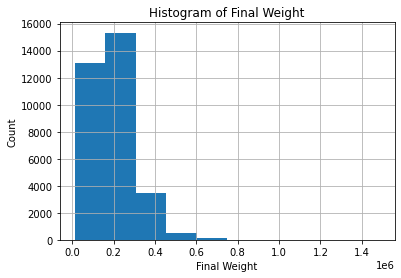

In [71]:
DF_Main.fnlwgt.hist() 
plt.title( 'Histogram of Final Weight' )
plt.xlabel('Final Weight')
plt.ylabel('Count')

#### Education Number

In [72]:
DF_Main['education-num'].describe()

count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64

In [73]:
DF_Main['education-num'].isnull().sum()

0

Text(0, 0.5, 'Count')

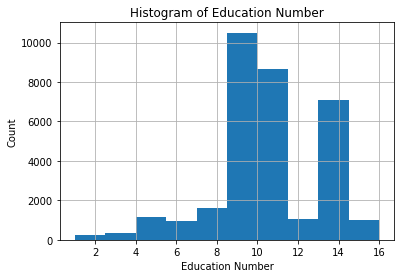

In [74]:
DF_Main['education-num'].hist() 
plt.title( 'Histogram of Education Number' )
plt.xlabel('Education Number')
plt.ylabel('Count')

The data can be considered slightly positively skewed.

#### Capital Gain

In [75]:
DF_Main['capital-gain'].describe()

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [76]:
DF_Main['capital-gain'].isnull().sum()

0

Text(0, 0.5, 'Count')

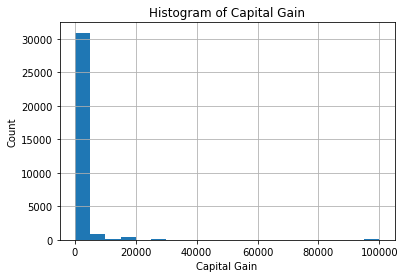

In [77]:
DF_Main['capital-gain'].hist(bins = 20)
plt.title( 'Histogram of Capital Gain' )
plt.xlabel('Capital Gain')
plt.ylabel('Count')

The overwhelming majority of respondents indicated earning a slight capital gain or no capital gain at all. In fact, specifically, the majority of respondents identified making no capital gain, a sign that most respondents are either not invested or did not profit/sell any investments during the subject year.

#### Capital Loss

In [78]:
DF_Main['capital-loss'].describe()

count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

In [79]:
DF_Main['capital-loss'].isnull().sum()

0

Text(0, 0.5, 'Count')

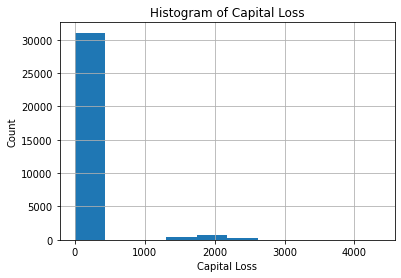

In [80]:
DF_Main['capital-loss'].hist()
plt.title( 'Histogram of Capital Loss' )
plt.xlabel('Capital Loss')
plt.ylabel('Count')

Similar to capital gain, most respondents identified incurring little or no capital loss, with the large majority incurring no capital loss which indicates that most respondents are either not invested or did not sell any investments during the subject year.

#### Hours per Week

In [81]:
DF_Main['hours-per-week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [82]:
DF_Main['hours-per-week'].isnull().sum()

0

Text(0, 0.5, 'Count')

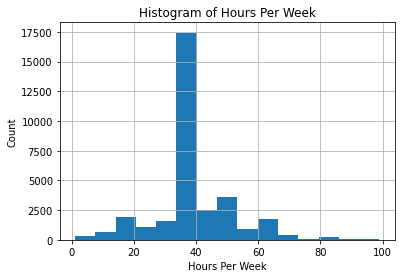

In [83]:
DF_Main['hours-per-week'].hist(bins=15)
plt.title( 'Histogram of Hours Per Week' )
plt.xlabel('Hours Per Week')
plt.ylabel('Count')

The hours per week occupied by work is relatively normally distributed with the averge work week falling around the typical "40-hour work week." 

### Categorical Columns

#### Workclass

In [84]:
DF_Main['workclass'].describe()

count        32561
unique           9
top        Private
freq         22696
Name: workclass, dtype: object

In [85]:
DF_Main['workclass'].isnull().sum()

0

In [86]:
DF_Main.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [87]:
round(DF_Main.workclass.value_counts() / len(DF_Main),4)

 Private             0.6970
 Self-emp-not-inc    0.0780
 Local-gov           0.0643
 ?                   0.0564
 State-gov           0.0399
 Self-emp-inc        0.0343
 Federal-gov         0.0295
 Without-pay         0.0004
 Never-worked        0.0002
Name: workclass, dtype: float64

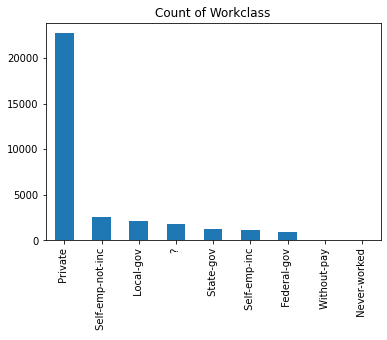

In [88]:
DF_Main.workclass.value_counts().plot.bar(title="Count of Workclass")

The large majority of respondents identified as working in the private sector which makes sense because the majority of jobs in America come from the private sector. 

#### Education

In [89]:
DF_Main['education'].describe()

count        32561
unique          16
top        HS-grad
freq         10501
Name: education, dtype: object

In [90]:
DF_Main['education'].isnull().sum()

0

In [91]:
DF_Main.education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [92]:
round(DF_Main.education.value_counts() / len(DF_Main),4)

 HS-grad         0.3225
 Some-college    0.2239
 Bachelors       0.1645
 Masters         0.0529
 Assoc-voc       0.0424
 11th            0.0361
 Assoc-acdm      0.0328
 10th            0.0287
 7th-8th         0.0198
 Prof-school     0.0177
 9th             0.0158
 12th            0.0133
 Doctorate       0.0127
 5th-6th         0.0102
 1st-4th         0.0052
 Preschool       0.0016
Name: education, dtype: float64

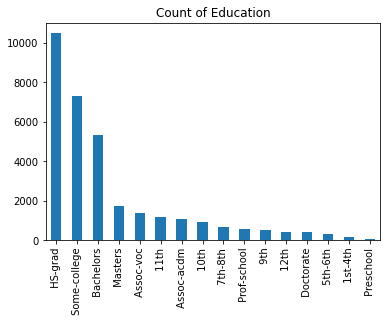

In [93]:
DF_Main.education.value_counts().plot.bar(title="Count of Education")

The smallest classes for education level include the lowest levels (preschool, secondary education grades, etc.) and highest levels (doctorate and professional school), which makes sense and indicates that the education level of the population is relatively normally distributed. 

#### Marital Status

In [94]:
DF_Main['marital-status'].describe()

count                   32561
unique                      7
top        Married-civ-spouse
freq                    14976
Name: marital-status, dtype: object

In [95]:
DF_Main['marital-status'].isnull().sum()

0

In [96]:
DF_Main['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [97]:
round(DF_Main['marital-status'].value_counts() / len(DF_Main),4)

 Married-civ-spouse       0.4599
 Never-married            0.3281
 Divorced                 0.1365
 Separated                0.0315
 Widowed                  0.0305
 Married-spouse-absent    0.0128
 Married-AF-spouse        0.0007
Name: marital-status, dtype: float64

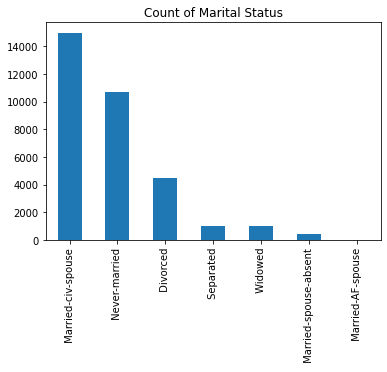

In [98]:
DF_Main['marital-status'].value_counts().plot.bar(title="Count of Marital Status")

#### Occupation

In [99]:
DF_Main['occupation'].describe()

count               32561
unique                 15
top        Prof-specialty
freq                 4140
Name: occupation, dtype: object

In [100]:
DF_Main['occupation'].isnull().sum()

0

In [101]:
DF_Main['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [102]:
round(DF_Main['occupation'].value_counts() / len(DF_Main),4)

 Prof-specialty       0.1271
 Craft-repair         0.1259
 Exec-managerial      0.1249
 Adm-clerical         0.1158
 Sales                0.1121
 Other-service        0.1012
 Machine-op-inspct    0.0615
 ?                    0.0566
 Transport-moving     0.0490
 Handlers-cleaners    0.0421
 Farming-fishing      0.0305
 Tech-support         0.0285
 Protective-serv      0.0199
 Priv-house-serv      0.0046
 Armed-Forces         0.0003
Name: occupation, dtype: float64

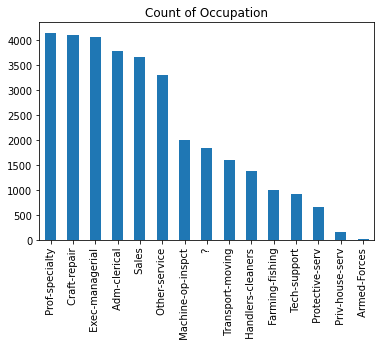

In [103]:
DF_Main['occupation'].value_counts().plot.bar(title="Count of Occupation")

#### Relationship

In [104]:
DF_Main['relationship'].describe()

count        32561
unique           6
top        Husband
freq         13193
Name: relationship, dtype: object

In [105]:
DF_Main['relationship'].isnull().sum()

0

In [106]:
DF_Main['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [107]:
round(DF_Main['relationship'].value_counts() / len(DF_Main),4)

 Husband           0.4052
 Not-in-family     0.2551
 Own-child         0.1556
 Unmarried         0.1058
 Wife              0.0482
 Other-relative    0.0301
Name: relationship, dtype: float64

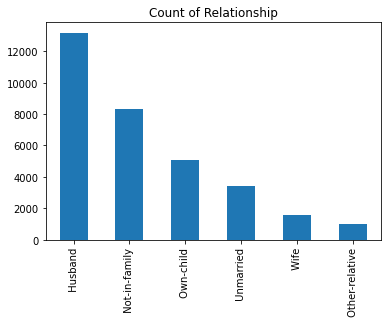

In [108]:
DF_Main['relationship'].value_counts().plot.bar(title="Count of Relationship")

#### Race

In [109]:
DF_Main['race'].describe()

count      32561
unique         5
top        White
freq       27816
Name: race, dtype: object

In [110]:
DF_Main['race'].isnull().sum()

0

In [111]:
DF_Main['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [112]:
round(DF_Main['race'].value_counts() / len(DF_Main),4)

 White                 0.8543
 Black                 0.0959
 Asian-Pac-Islander    0.0319
 Amer-Indian-Eskimo    0.0096
 Other                 0.0083
Name: race, dtype: float64

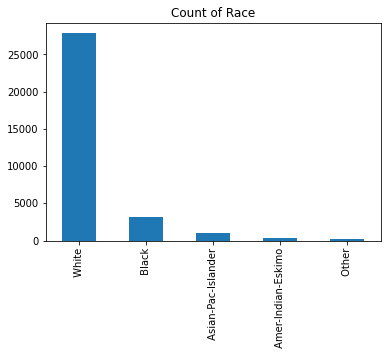

In [113]:
DF_Main['race'].value_counts().plot.bar(title="Count of Race")

The distribution of race classes seems relatively consistent with the national average, though the data does not include America's largest minority, the hispanic population. 

#### Sex

In [114]:
DF_Main['sex'].describe()

count     32561
unique        2
top        Male
freq      21790
Name: sex, dtype: object

In [115]:
DF_Main['sex'].isnull().sum()

0

In [116]:
DF_Main['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [117]:
round(DF_Main['sex'].value_counts() / len(DF_Main),4)

 Male      0.6692
 Female    0.3308
Name: sex, dtype: float64

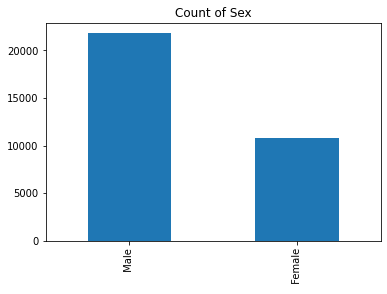

In [118]:
DF_Main['sex'].value_counts().plot.bar(title="Count of Sex")

The dataset is very skewed towards the male population as the actual population distribution of the two sexes is almost exactly 50/50. 

#### Native Country

In [119]:
DF_Main['native-country'].describe()

count              32561
unique                42
top        United-States
freq               29170
Name: native-country, dtype: object

In [120]:
DF_Main['native-country'].isnull().sum()

0

In [121]:
DF_Main['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [122]:
round(DF_Main['native-country'].value_counts() / len(DF_Main),4)

 United-States                 0.8959
 Mexico                        0.0197
 ?                             0.0179
 Philippines                   0.0061
 Germany                       0.0042
 Canada                        0.0037
 Puerto-Rico                   0.0035
 El-Salvador                   0.0033
 India                         0.0031
 Cuba                          0.0029
 England                       0.0028
 Jamaica                       0.0025
 South                         0.0025
 China                         0.0023
 Italy                         0.0022
 Dominican-Republic            0.0021
 Vietnam                       0.0021
 Guatemala                     0.0020
 Japan                         0.0019
 Poland                        0.0018
 Columbia                      0.0018
 Taiwan                        0.0016
 Haiti                         0.0014
 Iran                          0.0013
 Portugal                      0.0011
 Nicaragua                     0.0010
 Peru       

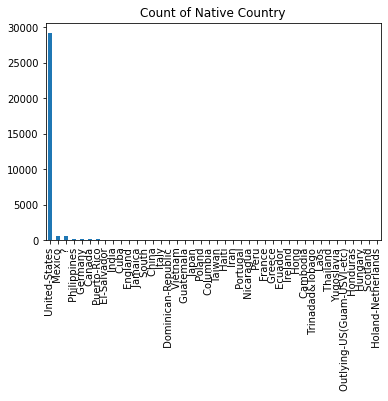

In [123]:
DF_Main['native-country'].value_counts().plot.bar(title="Count of Native Country")

I doubt that this distribution is representative of the population as I would assume more Americans are immigrants that have a coutry of origin other than the United States. 

## Task 3: Target Variable Exploration

In [124]:
# general description of target variable, 'y', including count, number of unique values, most frquent value along with its count, and datatype
DF_Main['y'].describe()

count      32561
unique         2
top        <=50K
freq       24720
Name: y, dtype: object

In [125]:
# number of null values in the target variable column
DF_Main['y'].isnull().sum()

0

In [126]:
# value counts of the two possible values for the target variable, <=50K and >50K 
DF_Main['y'].value_counts()

 <=50K    24720
 >50K      7841
Name: y, dtype: int64

In [127]:
# distribution of the two target variable values as a proportion of the total count 
round(DF_Main['y'].value_counts() / len(DF_Main),4)

 <=50K    0.7592
 >50K     0.2408
Name: y, dtype: float64

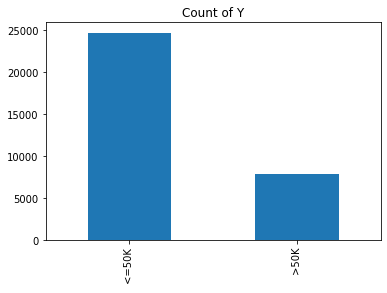

In [128]:
# bar chart of distribution of target variable 
DF_Main['y'].value_counts().plot.bar(title="Count of Y")

1.) The data mining task is a classification task. Regression tasks are meant to predict the value of continuous numerical variables while classification tasks are meant to predict the class label of discrete, categorical variables. In this case, the target variable is a discrete, categorical variable that contains two classes, income level at or below 50K (<=50K) and income level above 50K (>50K).  

2.) The target variable is imbalanced because the ratio of the two target variable classes is 3 to 1; approximately 76% of respondents identified an income level below 50K and approximately 24% of respondents identified an income level above 50K. The distribution of a perfectly balanced target variable with two classes would be 1 to 1 or 50/50. Whether the target variable is balanced or not is important because it influences which performance metrics to use because imbalanced data can lead to model bias in favor of the majority class, resulting in erroneous results (discussed later in further detail). 

3.) The majority classifier's accuracy on this target variable would be .76 (76%) because it would predict the majority class for every instance. Therefore, the models must have an accuracy score higher than 76% to beat the majority classifier. 

4.) I will be using accuracy, f1 score, and recall to evaluate the models. Accuracy is the least important metric while f1 score is the most important metric. I go into further detail answering this question in tasks 5-7. 

## Task 4: Target Exploration by Predictors

### Numerical Predictors 

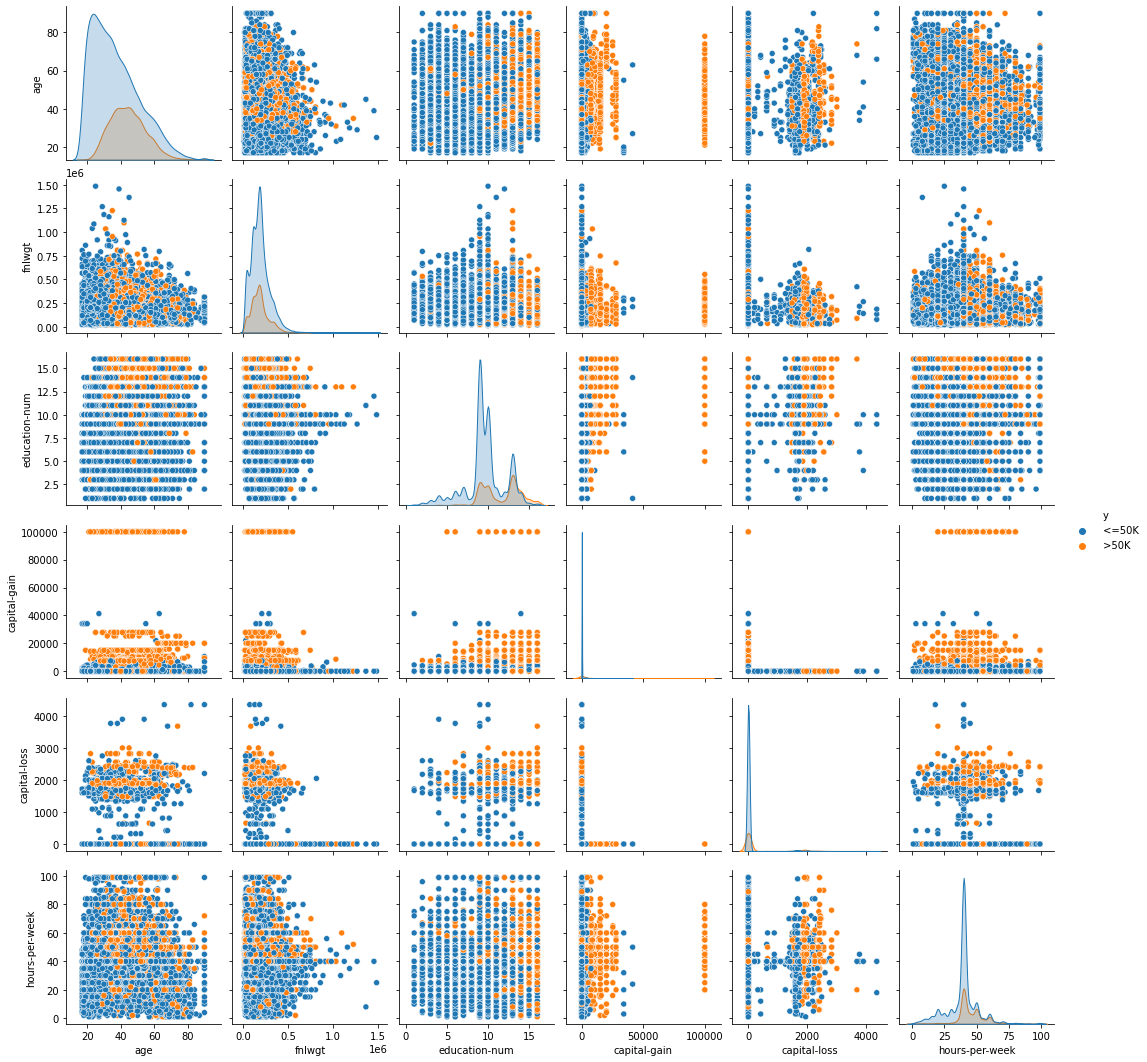

In [129]:
# seaborn pairplots representing the relationship between each numerical predictor and the target variable
sns.pairplot(DF_Main,hue='y')

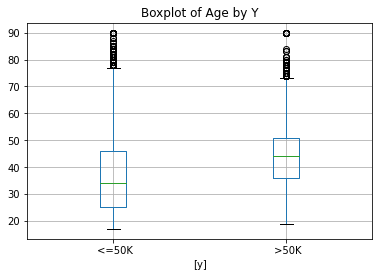

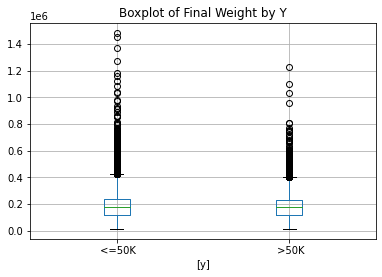

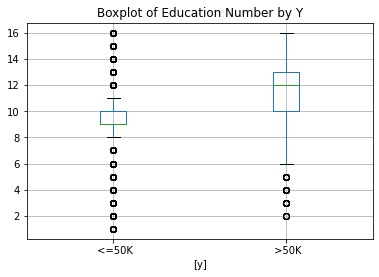

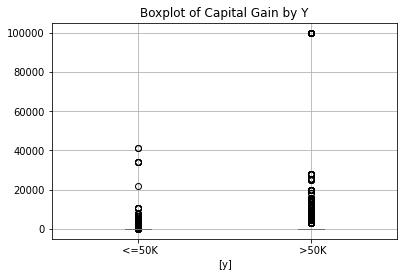

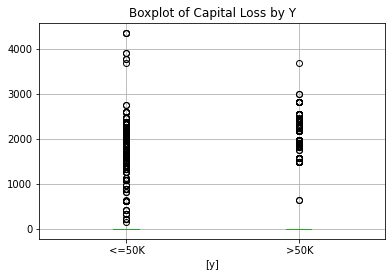

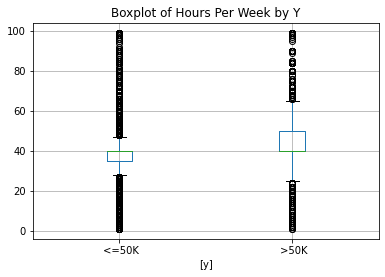

In [130]:
# box plots representing the relationship between each numerical predictor and the target variable 
DF_Main.boxplot(column=['age'],by=['y']) 
plt.title( 'Boxplot of Age by Y' )
plt.suptitle('')
plt.show()
 
DF_Main.boxplot(column=['fnlwgt'],by=['y']) 
plt.title( 'Boxplot of Final Weight by Y' )
plt.suptitle('')
plt.show()

DF_Main.boxplot(column=['education-num'],by=['y']) 
plt.title( 'Boxplot of Education Number by Y' )
plt.suptitle('')
plt.show()

DF_Main.boxplot(column=['capital-gain'],by=['y']) 
plt.title( 'Boxplot of Capital Gain by Y' )
plt.suptitle('')
plt.show()
 
DF_Main.boxplot(column=['capital-loss'],by=['y']) 
plt.title( 'Boxplot of Capital Loss by Y' )
plt.suptitle('')
plt.show()

DF_Main.boxplot(column=['hours-per-week'],by=['y']) 
plt.title( 'Boxplot of Hours Per Week by Y' )
plt.suptitle('')
plt.show()

I was able to discern two relatively clear relationships between the numerical predictors and target variable:

- Capital Gain and Income: those earning larger capital gains are more likely to make more than 50K in income. This makes intuitive sense because capital gain is a component of income. Therefore, if capital gain is large, the capital gain component of income will be large, contributing to an overall higher income level. 
- Education Number and Income: those with a higher education number are more likely to make more than 50K. This also makes intuitive sense because those who achieve a higher education level tend to gain more applicable job skills and knowledge, and as a result, receive more job offers with higher salaries. 



### Categorical Predictors 

Text(0.5, 1.0, 'Income Level by Workclass')

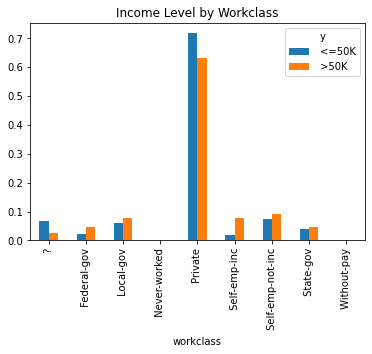

In [131]:
# proportions by workclass
ct = pd.crosstab(DF_Main['workclass'], DF_Main['y'])
Workclass_DF = ct.div(ct.sum(axis=0), axis=1)
Workclass_DF.plot(kind='bar')
plt.title('Income Level by Workclass')

Other than the '?' workclass, the workclass with the most uneven distribution is the 'self-employed-not-inc' workclass. Repondents in this workclass were signicantly more likely to make more than 50K in income. There are many variables that might contribute to this, including the fact that self-employed individuals are typically more driven and there is unlimited earning potential as an entrepreneur. 

Text(0.5, 1.0, 'Income Level by Education')

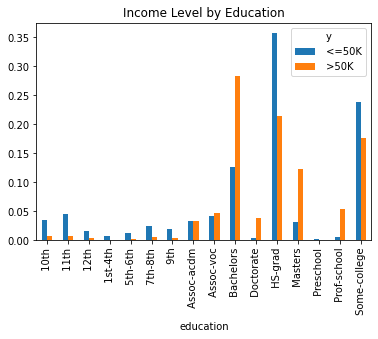

In [132]:
# proportions by education level
ct = pd.crosstab(DF_Main['education'], DF_Main['y'])
Education_DF = ct.div(ct.sum(axis=0), axis=1)
Education_DF.plot(kind='bar')
plt.title('Income Level by Education')

It is no surprise here that every education level below bachelors degree has a larger proportion of respondents making less than 50K than more than 50K. Moreover, every education level characterized by the obtainment of a college degree (undergraduate, graduate, and professional) has a larger proportion of respondents making more than 50K. Additionally, the proportion of respondents making more than 50K increases as the level of degree increases. There is a very clear and obvious relationship between education and income level. 

Text(0.5, 1.0, 'Income Level by Marital Status')

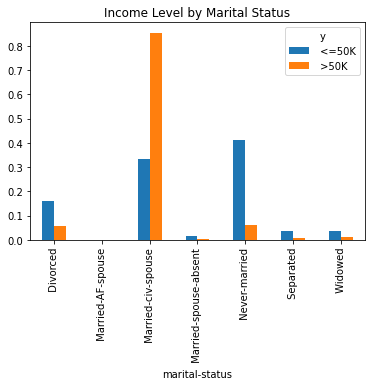

In [133]:
# proportions by marital status 
ct = pd.crosstab(DF_Main['marital-status'], DF_Main['y'])
Marital_DF = ct.div(ct.sum(axis=0), axis=1)
Marital_DF.plot(kind='bar')
plt.title('Income Level by Marital Status')

Every marital status other than 'married' has a higher proportion of respondents making less than 50K vs more than 50K. There is a relatively clear relationship between marital status and income level. 

Text(0.5, 1.0, 'Income Level by Occupation')

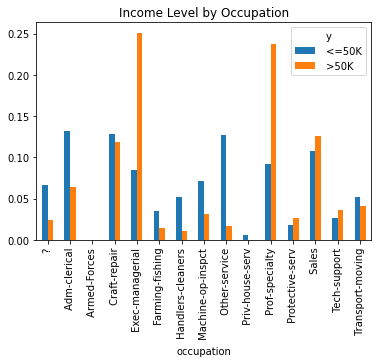

In [134]:
# proportions by occupation
ct = pd.crosstab(DF_Main['occupation'], DF_Main['y'])
Occupation_DF = ct.div(ct.sum(axis=0), axis=1)
Occupation_DF.plot(kind='bar')
plt.title('Income Level by Occupation')

There is a relatively clear relationship between occupation and income level as blue collar jobs are more likely to earn less than 50K while white collar jobs are more likely to earn more than 50K. 

Text(0.5, 1.0, 'Income Level by Relationship Status')

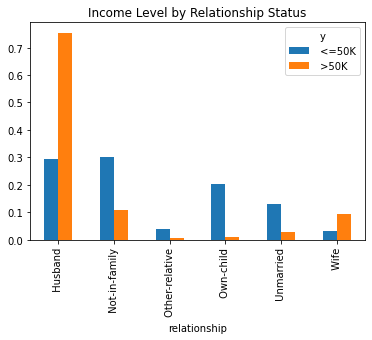

In [135]:
# proportions by relationship status
ct = pd.crosstab(DF_Main['relationship'], DF_Main['y'])
Relationship_DF = ct.div(ct.sum(axis=0), axis=1)
Relationship_DF.plot(kind='bar')
plt.title('Income Level by Relationship Status')

Similar to the analysis of marital status, only respondents identifying as being a husband or wife are more likely to earn more than 50K.

Text(0.5, 1.0, 'Income Level by Race')

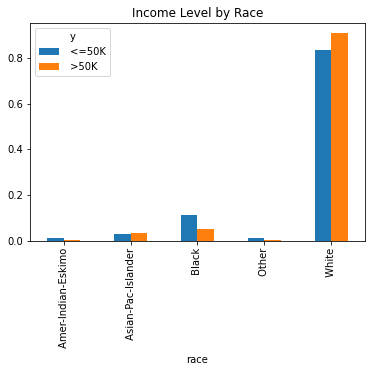

In [136]:
# proportions by race
ct = pd.crosstab(DF_Main['race'], DF_Main['y'])
Race_DF = ct.div(ct.sum(axis=0), axis=1)
Race_DF.plot(kind='bar')
plt.title('Income Level by Race')

The relationship between race and income level is not as clear as I would have thought. The distribution of the two target variable classes among the white population is relatively balanced, only slighty favoring the '>50K' class. Additionally, Asian-Pacific Islanders are more likely to make more than 50K, which is surprising. 

Text(0.5, 1.0, 'Income Level by Sex')

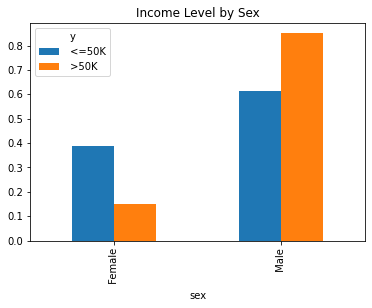

In [137]:
# proportions by sex
ct = pd.crosstab(DF_Main['sex'], DF_Main['y'])
Sex_DF = ct.div(ct.sum(axis=0), axis=1)
Sex_DF.plot(kind='bar')
plt.title('Income Level by Sex')

The relationship between sex and income level is clear and predictable, and the data reaffirms the notion that there is  a "gender pay gap."

y,<=50K,>50K
native-country,,
?,0.017678,0.018620
Cambodia,0.000485,0.000893
Canada,0.003317,0.004974
China,0.002225,0.002551
Columbia,0.002306,0.000255
Cuba,0.002832,0.003188
Dominican-Republic,0.002751,0.000255
Ecuador,0.000971,0.000510
El-Salvador,0.003924,0.001148


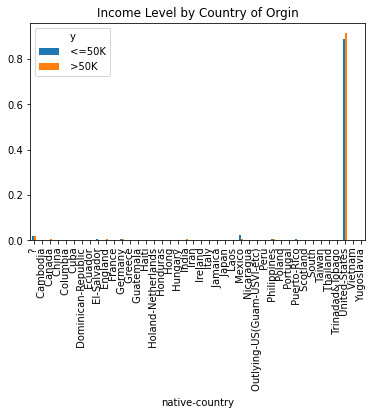

In [138]:
# proportions by national origin
ct = pd.crosstab(DF_Main['native-country'], DF_Main['y'])
Country_DF = ct.div(ct.sum(axis=0), axis=1)
Country_DF.plot(kind='bar')
plt.title('Income Level by Country of Orgin')

ct = pd.crosstab(DF_Main['native-country'], DF_Main['y'])
ct.div(ct.sum(axis=0), axis=1)

The relationship between national origin and income level is not perfectly clear, though the data does seem to indicate that respondents from third world countries are less likely to make more than 50K than respondents from first world coutries or the United States.  

## Data Encoding

In [139]:
# pop the target variable out of the dataframe 
y_target = DF_Main.pop('y')

In [140]:
y_target = pd.get_dummies(y_target,drop_first=True)

In [141]:
# one-hot encode the dataframe and display the new, resulting dataframe 
DF_Main_encoded = pd.get_dummies(DF_Main)

DF_Main_encoded.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
DF_Main.shape

(32561, 14)

In [143]:
DF_Main_encoded.shape

(32561, 108)

The shape of the dataframe changed because the number of columns increased as a result of the one-hot encoding. Each categorical column ('workclass', 'education', 'marrital-status', 'occupation', 'relationship', 'race', 'sex', and 'native-country') was expanded so that the categorical variable is represented by the corresponding number of categories associated with the variable. For instance, after one-hot encoding, the 'native-country' column/variable is represented by 42 new columns that represent each possible country an instance could be associated with. Therefore, if a respondent's country of origin was Mexico, the value of the 'native-country_Mexico' column would be 1 and the value for the other 41 columns would be 0. 

## Tasks 5-7: Model Building and Evaluation

### Decision Tree

In [144]:
# Decision Tree model and range of parameters for GridSearch to evaluate
parameters = {'ccp_alpha':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
              }

tree_model = tree.DecisionTreeClassifier(random_state=42) 
clf_0 = GridSearchCV(tree_model, parameters,scoring=['accuracy','recall','f1'],refit=False,cv=3,return_train_score=True) # 3 fold cross-validation
clf_0.fit(DF_Main_encoded, y_target)


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                       0.8, 0.9, 1]},
             refit=False, return_train_score=True,
             scoring=['accuracy', 'recall', 'f1'])

In [145]:
# # results of Decision Tree model ordered from greatest to lowest accuracy score along with corresponding n_neighbors parameter value and recall and f1 scores
grid_search_results = pd.DataFrame(clf_0.cv_results_)
grid_search_results = grid_search_results[['rank_test_accuracy','param_ccp_alpha','mean_test_accuracy','mean_train_accuracy','mean_test_recall','mean_train_recall','mean_test_f1','mean_train_f1']]
grid_search_results.sort_values(by='rank_test_accuracy')

,rank_test_accuracy,param_ccp_alpha,mean_test_accuracy,mean_train_accuracy,mean_test_recall,mean_train_recall,mean_test_f1,mean_train_f1
0,1,0,0.813796,0.999985,0.622242,0.999936,0.616781,0.999968
1,2,0.1,0.759190,0.759190,0.000000,0.000000,0.000000,0.000000
2,2,0.2,0.759190,0.759190,0.000000,0.000000,0.000000,0.000000
3,2,0.3,0.759190,0.759190,0.000000,0.000000,0.000000,0.000000
4,2,0.4,0.759190,0.759190,0.000000,0.000000,0.000000,0.000000
5,2,0.5,0.759190,0.759190,0.000000,0.000000,0.000000,0.000000
6,2,0.6,0.759190,0.759190,0.000000,0.000000,0.000000,0.000000
7,2,0.7,0.759190,0.759190,0.000000,0.000000,0.000000,0.000000
8,2,0.8,0.759190,0.759190,0.000000,0.000000,0.000000,0.000000
9,2,0.9,0.759190,0.759190,0.000000,0.000000,0.000000,0.000000


### SVM

In [146]:
# SVM model and range of parameters for GridSearch to evaluate
parameters = {'C':[1],
              'kernel':['rbf']
              }
svc = SVC(random_state=42)
clf2 = GridSearchCV(estimator = svc, param_grid = parameters,scoring='accuracy', cv=3)
clf2.fit(DF_Main_encoded, y_target)

clf2.score(DF_Main_encoded, y_target)

0.7962900402321796

In [147]:
# # top five results of SVM model (as measured by accuracy performance metric) along with corresponding parameter values
grid_search_df = pd.DataFrame(clf2.cv_results_)
print(grid_search_df.shape) 
grid_search_df.sort_values('rank_test_score',ascending=True).head()

(1, 13)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,22.046806,0.601122,9.963738,0.313958,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.793809,0.792703,0.793237,0.79325,0.000451,1


In [148]:
# SVM model and range of parameters for GridSearch to evaluate
parameters = {'C':[1],
              'kernel':['rbf']
              }
svc = SVC(random_state=42)
clf2 = GridSearchCV(estimator = svc, param_grid = parameters,scoring='recall', cv=3)
clf2.fit(DF_Main_encoded, y_target)

clf2.score(DF_Main_encoded, y_target)

0.15941844152531565

In [149]:
# # top five results of SVM model (as measured by recall performance metric) along with corresponding parameter values
grid_search_df = pd.DataFrame(clf2.cv_results_)
print(grid_search_df.shape) 
grid_search_df.sort_values('rank_test_score',ascending=True).head()

(1, 13)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,24.057042,2.892138,9.72018,0.073216,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.147284,0.141163,0.141982,0.143476,0.002713,1


In [150]:
# SVM model and range of parameters for GridSearch to evaluate
parameters = {'C':[1],
              'kernel':['rbf']
              }
svc = SVC(random_state=42)
clf2 = GridSearchCV(estimator = svc, param_grid = parameters,scoring='f1', cv=3)
clf2.fit(DF_Main_encoded, y_target)

clf2.score(DF_Main_encoded, y_target)

0.27373261797875836

In [151]:
# # top five results of SVM model (as measured by f1 performance metric) along with corresponding parameter values
grid_search_df = pd.DataFrame(clf2.cv_results_)
print(grid_search_df.shape) 
grid_search_df.sort_values('rank_test_score',ascending=True).head()

(1, 13)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,23.666287,0.320776,9.741699,0.153051,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.255984,0.246988,0.248493,0.250488,0.003934,1


### MLP

In [152]:
# MLP model and range of parameters for GridSearch to evaluate
parameters = {'hidden_layer_sizes':[(2,2)],
              'learning_rate_init':[0.1,0.01],
              'activation':['identity', 'relu'],
              'alpha':[1,0.3]
              }

mlp = MLPClassifier(max_iter= 750, random_state=2021)
clf = GridSearchCV(mlp, parameters, scoring = ['accuracy','recall','f1'], return_train_score=True, refit=False, cv=3)
clf.fit(DF_Main_encoded, y_target)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=750, random_state=2021),
             param_grid={'activation': ['identity', 'relu'], 'alpha': [1, 0.3],
                         'hidden_layer_sizes': [(2, 2)],
                         'learning_rate_init': [0.1, 0.01]},
             refit=False, return_train_score=True,
             scoring=['accuracy', 'recall', 'f1'])

In [153]:
# top five results of MLP model (as measured by accuracy performance metric) along with corresponding parameter values and other performance metrics
grid_search_df = pd.DataFrame(clf.cv_results_)
grid_search_df.sort_values('rank_test_accuracy')[['rank_test_accuracy','params','mean_test_accuracy','mean_train_accuracy','mean_test_recall','mean_train_recall','mean_test_f1','mean_train_f1']].head()

,rank_test_accuracy,params,mean_test_accuracy,mean_train_accuracy,mean_test_recall,mean_train_recall,mean_test_f1,mean_train_f1
3,1,"{'activation': 'identity', 'alpha': 0.3, 'hidd...",0.804429,0.804720,0.293713,0.292820,0.419683,0.419315
1,2,"{'activation': 'identity', 'alpha': 1, 'hidden...",0.804183,0.804152,0.256605,0.255705,0.383237,0.382735
2,3,"{'activation': 'identity', 'alpha': 0.3, 'hidd...",0.798686,0.798593,0.196661,0.195255,0.319599,0.318149
0,4,"{'activation': 'identity', 'alpha': 1, 'hidden...",0.792604,0.793142,0.209413,0.209667,0.327220,0.328187
4,5,"{'activation': 'relu', 'alpha': 1, 'hidden_lay...",0.759190,0.759190,0.000000,0.000000,0.000000,0.000000


### KNN

In [154]:
# scale dataframe 
DF_Main_Encoded_Scaled = DF_Main_encoded.copy()
column_names = DF_Main_Encoded_Scaled.columns

DF_Main_Encoded_Scaled = StandardScaler().fit_transform(DF_Main_Encoded_Scaled)
DF_Main_Encoded_Scaled = pd.DataFrame(DF_Main_Encoded_Scaled,columns = column_names )

In [155]:
# verify that dataframe is scaled
DF_Main_Encoded_Scaled.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,-0.24445,-0.174295,-0.262097,-0.014664,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,-0.24445,-0.174295,-0.262097,-0.014664,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,-0.24445,-0.174295,-0.262097,-0.014664,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,-0.24445,-0.174295,-0.262097,-0.014664,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,-0.24445,-0.174295,-0.262097,-0.014664,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,-2.932948,-0.045408,-0.022173


In [156]:
# set n_neighbors parameter to search for neighbor options 1 through 10
parameters = {'n_neighbors': [i for i in range(11)],
              }

In [157]:
# KNN model
clf = GridSearchCV(KNeighborsClassifier(), parameters,scoring=['accuracy','recall','f1'], refit=False, cv = 3, return_train_score=True).fit(DF_Main_Encoded_Scaled, y_target)
result_df = pd.DataFrame(clf.cv_results_)
result_df[result_df['rank_test_accuracy']==1]['mean_test_accuracy']

8    0.827247
Name: mean_test_accuracy, dtype: float64

In [158]:
# results of KNN model ordered from greatest to lowest accuracy score along with corresponding n_neighbors parameter value
result_df[['param_n_neighbors','mean_test_accuracy','mean_train_accuracy','mean_test_recall','mean_train_recall','mean_test_f1','mean_train_f1']].sort_values(by='mean_test_accuracy',ascending=False).head(10)

,param_n_neighbors,mean_test_accuracy,mean_train_accuracy,mean_test_recall,mean_train_recall,mean_test_f1,mean_train_f1
8,8,0.827247,0.858266,0.496367,0.564087,0.580445,0.657138
10,10,0.826817,0.853920,0.499045,0.560771,0.581176,0.648963
9,9,0.825988,0.857253,0.559369,0.625877,0.607540,0.678625
7,7,0.825712,0.863671,0.567149,0.645390,0.610416,0.695120
6,6,0.824360,0.864501,0.480041,0.565107,0.568279,0.667586
5,5,0.823286,0.874159,0.570847,0.676126,0.608709,0.721264
4,4,0.822456,0.874789,0.454917,0.567530,0.552314,0.685819
3,3,0.816529,0.894337,0.572378,0.734154,0.600373,0.769922
2,2,0.809895,0.894460,0.381328,0.561727,0.491312,0.719353
1,1,0.792390,0.999985,0.564087,0.999936,0.566740,0.999968


### Majority-Classifier

In [159]:
# Majority-Classifer model along with resulting confusion matrix
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(DF_Main_encoded, y_target)

print(confusion_matrix(y_true=y_target,y_pred=dummy_clf.predict(DF_Main_encoded)))

[[24720     0]
 [ 7841     0]]


In [160]:
# performance metrics for Majority-Classifier model
print(metrics.classification_report(y_target,dummy_clf.predict(DF_Main_encoded)))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     24720
           1       0.00      0.00      0.00      7841

    accuracy                           0.76     32561
   macro avg       0.38      0.50      0.43     32561
weighted avg       0.58      0.76      0.66     32561



### Model Evaluation

Five models were tested: decision tree, support vector machine (SVM), multilayer perceptron (MLP), k-Nearest Neighbors, and majority-classifier. Three performance metrics were used to evaluate the models: accuracy, f-1, and recall. It is important to take a holisitc approach when evaluating models as certain metrics can be misleading at times when viewed in isolation; multiple metrics are required to paint a complete picture of a model. Especially when two or more models are compared it is important to take into consideration multiple metrics because multiple models might have the same value for a certain metric, requiring other metrics to differentiate and evaluate.

Accuracy measures the overall correctness of the model and is calculated as the sum of correct classifications divided by the total number of classifications. Accuracy is usually the primary performance metric used to evaluate models when the data is balanced. Imbalanced data occurs when one target class represents a significant portion of observations. The dataset being evaluated is imbalanced because the distributuion of the two dependent variable classes is 3 to 1. Because the data is imbalanced, the f1 score is a better metric because it is optimally designed to handle imbalanced data. f1 score is considered to be the "harmonic mean of precision and recall." One of the disadvantages of f1 score is it is more complicated to understand and more difficult to explain to stakeholders and decision makers, especially compared to accuraccy, for instance.

Recall measures the model’s ability to predict the positives and is calcualated as the total value of true positives divided by the sum of true positives and false negatives. Recall is a good metric to use when trying to predict as many true positives as possible. For example, recall would be an important metric for a model tasked with determining if a patient has cancer because it is crucial that the model correctly identifies the instances with cancer because the consequences are dire if the cancer is not detected; false positives are tolerated in this situation.  

No particular model stands out as being exceptional in terms of accuracy as all five models fall within a relatively close range (0.76-0.827). But again, accuracy is not the best metric for this dataset because the data is imbalanced. There is much more variabilty among the models when it comes to f1 score, with the highest f1 score being 0.616 (decision tree) and lowest being 0.25 (SVM). However, no single model stands out as exceptional as multiple models have an f1 score hovering right around 0.6. Overall, relatively speaking, none of the models stand out as being exceptional or significantly better than the others. 

### Comparison to Baseline

The majority-classifier was used as a baseline to compare agaisnt the other models. I decided to use the macro average output of the majority classifier metrics. In terms of recall, the majority classifier outperformed the MLP and SVM models but underperformed the decision tree and KNN models. The majority classifier had a recall of 0.50, better than the recall scores of the SVM and MLP models (0.14 and 0.29, respectively) but lower than the decision tree and KNN recall scores (0.62 and 0.57, respectively). The accuracy scores of the four models (decision tree = 0.81, SVM = 0.79, MLP = 0.80, KNN = 0.83) all outperformed the majority classifier's accuracy score of 0.76. In terms of f1 score, the most appropriate metric for the imbalanced dataset, the majority-classifier's score (.43) outperformed the SVM and MLP models (0.25 and 0.42, repectively) but was outperformed by the decison tree and KNN models (0.62 and 0.61, respectively). 

### Final Model Reccomendation

My final reccomendation came down to the decision tree and KNN models because both models had similar values for all three performance metrics. The SVM and MLP models were generally inferior models, especially in terms of their f1 and recall scores. I decided on the KNN model for my final reccomendation. Although the KNN model had lower f1 and recall scores compared to the decision tree model, they were not too far off from each other. Therefore, the factor that made me choose the KNN model was the level of overfitting. The KNN model had significantly less overfitting than the decision tree model. Specifcally, the difference between the decision tree's f1 test score and f1 train score was 0.38 while the difference between the KNN model's f1 test score and f1 train score was only 0.076, and the difference between the decision tree's recall test score and recall train score was 0.38 while the difference between the KNN model's recall test score and recall train score was only 0.067, and the difference between the decision tree's accuracy test score and accuracy train score was 0.186 while the difference between the KNN model's accuracy test score and accuracy train score was only 0.031.  

In [161]:
!jupyter nbconvert --to html P1_Dvorak_Drake.ipynb

[NbConvertApp] WARNING | pattern 'P1_Dvorak_Drake.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute